### Visualizing financial data and performing clustering to understand share market behaviour

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [323]:
securities = pd.read_csv('../input/nyse-stock-exchange-data/securities.csv')
df = pd.read_csv('../input/nyse-stock-exchange-data/fundamentals.csv')
df.head(2)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.0,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-569000000.0,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,473000000.0,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,386000000.0,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,845000000.0,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.0,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.0,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-346000000.0,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-235000000.0,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,559000000.0,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,853000000.0,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.0,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08


### Renaming columns

In [324]:
cols = []
for col in df.columns:
    cols.append(col.strip().replace(' ', '_'))
cols[:5]

['Ticker_Symbol',
 'Period_Ending',
 'Accounts_Payable',
 'Accounts_Receivable',
 "Add'l_income/expense_items"]

In [325]:
new_cols = []
for col in cols:
    name = ''
    new_cols.append(name.join(re.findall('[\w\s]', col)))
new_cols[:5]

['Ticker_Symbol',
 'Period_Ending',
 'Accounts_Payable',
 'Accounts_Receivable',
 'Addl_incomeexpense_items']

In [326]:
df = df.rename(columns = dict(zip(df.columns, new_cols)))
df.head(2)

,Ticker_Symbol,Period_Ending,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Current_Ratio,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Quick_Ratio,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,For_Year,Earnings_Per_Share,Estimated_Shares_Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.0,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-569000000.0,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,473000000.0,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,386000000.0,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,845000000.0,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.0,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.0,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-346000000.0,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-235000000.0,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,559000000.0,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,853000000.0,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.0,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08


### Dropping null columns

In [327]:
df.shape

(1781, 78)

In [328]:
df = df.dropna(axis=1)
df.isnull().sum().sum()
df.shape

0

(1781, 72)

In [329]:
df.to_csv('fundamentals_cleaned.csv', index=False)
# df = pd.read_csv('fundamentals_cleaned.csv')

### KMeans clustering after grouping by Ticker_Symbol

In [330]:
df.dtypes.value_counts()

float64    70
object      2
dtype: int64

In [331]:
dfc = df.copy()

In [332]:
g = pd.DataFrame(dfc.groupby('Ticker_Symbol').mean())
scaler = StandardScaler()
g = scaler.fit_transform(g)
g = pd.DataFrame(g, columns = df.groupby('Ticker_Symbol').mean().columns,
                 index = dfc.groupby('Ticker_Symbol').mean().index)
g.head(3)

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,-0.014684,0.074877,-3.099314,0.358506,-0.979051,0.461047,-0.128348,0.215027,-0.172575,-0.008650,0.012045,-0.212650,0.060756,-0.187895,-0.294045,0.310194,-0.13035,0.644938,-0.113087,0.657466,1.085777,-0.956195,-0.008469,0.474542,-0.162525,0.173923,-0.453738,0.211397,-0.166952,-0.145837,-0.275189,0.137045,-0.035286,-0.063963,0.200348,-0.090301,-0.000862,0.108631,0.003912,-0.310674,-0.235788,0.491502,0.157364,-0.712887,-0.107305,0.240690,-0.079707,-1.049275,0.120007,0.259287,0.070547,-0.100900,0.080295,-0.562758,0.148624,-0.289800,-0.289401,-0.664559,-0.206981,1.445648,-0.065463,0.866609,-0.080145,0.306841,0.838088,-0.493128,-0.028863,-0.088222,0.335651,0.276083
AAP,-0.111791,0.035926,-0.147649,-0.133122,0.346738,-0.427877,-0.149078,-0.533279,-0.176541,-0.268461,-0.224019,-0.312946,-0.400521,-0.337682,-0.313688,0.292620,-0.13035,-0.373638,-0.434622,0.031613,-0.250510,-0.249341,-0.247589,-0.265079,0.483555,0.128304,0.054208,-0.268840,-0.166952,-0.145837,-0.275189,-0.080576,-0.058001,-0.388108,0.106508,0.227067,-0.340378,-0.089774,-0.339080,-0.321286,-0.375160,-0.223839,-0.321615,-0.592643,-0.191713,-0.398166,-0.137226,0.209248,-0.108851,-0.055567,-0.165570,-0.009703,-0.311582,-0.579374,-0.097882,-0.663592,-0.289401,-0.309051,0.329418,-0.101417,-0.147100,-0.201560,-0.242133,-0.190380,-0.162844,-0.393111,-0.215203,-0.242049,-0.300925,0.276070
AAPL,3.335841,-5.806830,2.393402,-0.051800,-3.134351,-0.477417,0.166626,-0.640807,2.606567,3.675050,-0.224019,0.327696,3.801504,9.803753,10.710960,0.310194,-0.13035,0.690061,0.030059,-0.306148,5.288137,9.067830,0.292654,-0.315899,0.169886,-3.526116,7.300690,1.292906,0.862030,-0.145837,-0.275189,5.378299,2.916286,9.263072,-3.999562,-4.377260,11.383835,2.584884,11.505187,10.385402,3.398679,-0.223839,11.899622,0.747217,0.037495,6.966812,-0.061876,0.293137,-0.391414,-0.523481,0.368323,0.344460,-0.311582,0.766469,-0.052233,0.634843,5.581798,3.396988,-14.240821,0.986560,0.201494,4.516845,1.023358,5.888171,6.697736,4.245651,0.543827,1.023429,4.464691,0.282682


In [266]:
# g.to_csv('fundamentals_grouped_scaled.csv')
# g = pd.read_csv('fundamentals_grouped_scaled.csv', index_col = 'Ticker_Symbol')
# g.shape

In [333]:
gc = g.copy()
orig_cols = g.columns

In [334]:
def get_km_clusters(df, nc):
# function to fit KMeans on the dataset and calculate the inertia    
    
    dff = df.copy()
    km = KMeans(n_clusters = nc, random_state=21)
    clusters = km.fit_predict(dff.select_dtypes('float64'))
    dff['cluster'] = clusters
    return km.inertia_, silhouette_score(dff.select_dtypes('float64'), clusters), dff

In [335]:
# plotting the scree-plot
inertia = []
silhouette = []
n_clusters=[]
inertia_change = [0]
for n in range(2,16):
    i, s, _ = get_km_clusters(g, n)
    inertia.append(i)
    silhouette.append(s)
    n_clusters.append(n)
    inertia_change.append(abs(inertia_change[-1] - i))

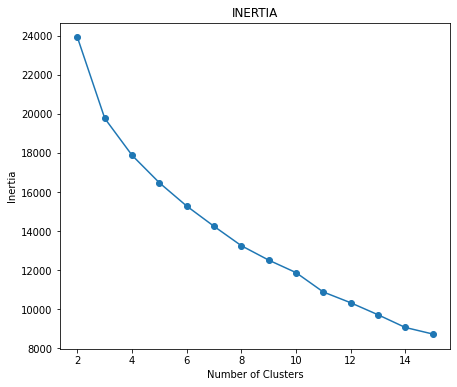

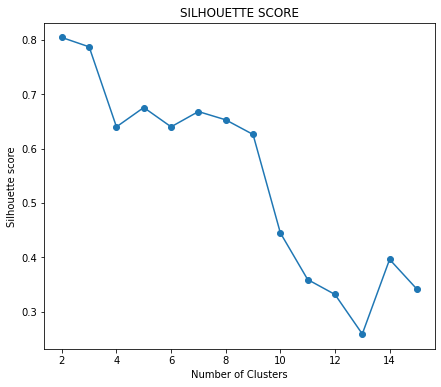

In [336]:
plt.figure(figsize=(7,6));
plt.plot(n_clusters, inertia, marker = 'o')
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');
plt.title('INERTIA');

plt.figure(figsize=(7,6));
plt.plot(n_clusters, silhouette, marker = 'o')
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette score');
plt.title('SILHOUETTE SCORE');

#### What is the change in inertia and silhouette score upon adding 1 more cluster ?

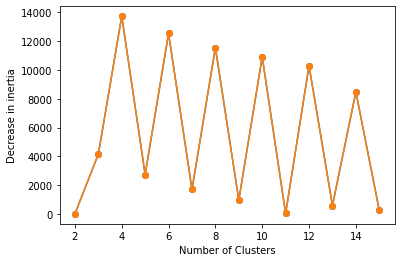

In [337]:
# plot to see the decrease in inertia upon adding 1 additional cluster
inertia_change = inertia_change[1:]
inertia_change[0] = 0
plt.plot(n_clusters, inertia_change, marker = 'o')
plt.plot(n_clusters, inertia_change, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Decrease in inertia');

### Based on the trend of inertia and silhoutte score, we can take either 5 clusters or 7 clusters. 

### Let us take 5 clusters initially.

### Plotting characteristics in each cluster. 

In [360]:
km = KMeans(n_clusters=5, random_state=21)
clusters = km.fit_predict(g.select_dtypes('float64'))
g['cluster'] = clusters
g.head(2)

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,-0.014684,0.074877,-3.099314,0.358506,-0.979051,0.461047,-0.128348,0.215027,-0.172575,-0.008650,0.012045,-0.212650,0.060756,-0.187895,-0.294045,0.310194,-0.13035,0.644938,-0.113087,0.657466,1.085777,-0.956195,-0.008469,0.474542,-0.162525,0.173923,-0.453738,0.211397,-0.166952,-0.145837,-0.275189,0.137045,-0.035286,-0.063963,0.200348,-0.090301,-0.000862,0.108631,0.003912,-0.310674,-0.235788,0.491502,0.157364,-0.712887,-0.107305,0.240690,-0.079707,-1.049275,0.120007,0.259287,0.070547,-0.100900,0.080295,-0.562758,0.148624,-0.289800,-0.289401,-0.664559,-0.206981,1.445648,-0.065463,0.866609,-0.080145,0.306841,0.838088,-0.493128,-0.028863,-0.088222,0.335651,0.276083,1
AAP,-0.111791,0.035926,-0.147649,-0.133122,0.346738,-0.427877,-0.149078,-0.533279,-0.176541,-0.268461,-0.224019,-0.312946,-0.400521,-0.337682,-0.313688,0.292620,-0.13035,-0.373638,-0.434622,0.031613,-0.250510,-0.249341,-0.247589,-0.265079,0.483555,0.128304,0.054208,-0.268840,-0.166952,-0.145837,-0.275189,-0.080576,-0.058001,-0.388108,0.106508,0.227067,-0.340378,-0.089774,-0.339080,-0.321286,-0.375160,-0.223839,-0.321615,-0.592643,-0.191713,-0.398166,-0.137226,0.209248,-0.108851,-0.055567,-0.165570,-0.009703,-0.311582,-0.579374,-0.097882,-0.663592,-0.289401,-0.309051,0.329418,-0.101417,-0.147100,-0.201560,-0.242133,-0.190380,-0.162844,-0.393111,-0.215203,-0.242049,-0.300925,0.276070,1


In [361]:
g['cluster'].value_counts()

1    414
0     24
2      6
3      3
4      1
Name: cluster, dtype: int64

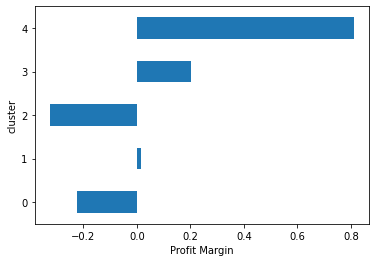

In [362]:
# PROFIT MARGIN

g.groupby('cluster')['Profit_Margin'].mean().plot(kind='barh')
plt.xlabel('Profit Margin');

#### Companies in clusters 0 and 2 have made loss on average, in the observation period. (The cluster numbers may change on running the clustering again).

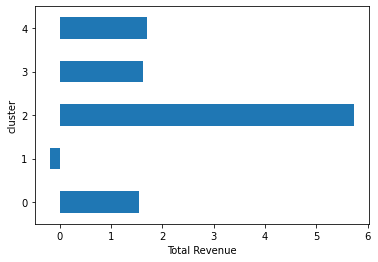

In [363]:
# REVENUE
g.groupby('cluster')['Total_Revenue'].mean().plot(kind='barh')
plt.xlabel('Total Revenue');

#### Cluster-2 companies have a very high revenue compared to others.

### Understanding the type of undustries in each cluster, with 5 clusters.

In [276]:
# g.index = dfc.groupby('Ticker_Symbol').mean().index

In [364]:
securities = pd.read_csv('../input/nyse-stock-exchange-data/securities.csv')
securities = securities[['Ticker symbol', 'Security','GICS Sector','GICS Sub Industry']]
securities.head(2)

,Ticker symbol,Security,GICS Sector,GICS Sub Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment


In [343]:
final = g.merge(securities, right_on = 'Ticker symbol', left_index=True)
final.index = g.index
final.head()

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,-0.014684,0.074877,-3.099314,0.358506,-0.979051,0.461047,-0.128348,0.215027,-0.172575,-0.008650,0.012045,-0.212650,0.060756,-0.187895,-0.294045,0.310194,-0.13035,0.644938,-0.113087,0.657466,1.085777,-0.956195,-0.008469,0.474542,-0.162525,0.173923,-0.453738,0.211397,-0.166952,-0.145837,-0.275189,0.137045,-0.035286,-0.063963,0.200348,-0.090301,-0.000862,0.108631,0.003912,-0.310674,-0.235788,0.491502,0.157364,-0.712887,-0.107305,0.240690,-0.079707,-1.049275,0.120007,0.259287,0.070547,-0.100900,0.080295,-0.562758,0.148624,-0.289800,-0.289401,-0.664559,-0.206981,1.445648,-0.065463,0.866609,-0.080145,0.306841,0.838088,-0.493128,-0.028863,-0.088222,0.335651,0.276083,0,AAL,American Airlines Group,Industrials,Airlines
AAP,-0.111791,0.035926,-0.147649,-0.133122,0.346738,-0.427877,-0.149078,-0.533279,-0.176541,-0.268461,-0.224019,-0.312946,-0.400521,-0.337682,-0.313688,0.292620,-0.13035,-0.373638,-0.434622,0.031613,-0.250510,-0.249341,-0.247589,-0.265079,0.483555,0.128304,0.054208,-0.268840,-0.166952,-0.145837,-0.275189,-0.080576,-0.058001,-0.388108,0.106508,0.227067,-0.340378,-0.089774,-0.339080,-0.321286,-0.375160,-0.223839,-0.321615,-0.592643,-0.191713,-0.398166,-0.137226,0.209248,-0.108851,-0.055567,-0.165570,-0.009703,-0.311582,-0.579374,-0.097882,-0.663592,-0.289401,-0.309051,0.329418,-0.101417,-0.147100,-0.201560,-0.242133,-0.190380,-0.162844,-0.393111,-0.215203,-0.242049,-0.300925,0.276070,0,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AAPL,3.335841,-5.806830,2.393402,-0.051800,-3.134351,-0.477417,0.166626,-0.640807,2.606567,3.675050,-0.224019,0.327696,3.801504,9.803753,10.710960,0.310194,-0.13035,0.690061,0.030059,-0.306148,5.288137,9.067830,0.292654,-0.315899,0.169886,-3.526116,7.300690,1.292906,0.862030,-0.145837,-0.275189,5.378299,2.916286,9.263072,-3.999562,-4.377260,11.383835,2.584884,11.505187,10.385402,3.398679,-0.223839,11.899622,0.747217,0.037495,6.966812,-0.061876,0.293137,-0.391414,-0.523481,0.368323,0.344460,-0.311582,0.766469,-0.052233,0.634843,5.581798,3.396988,-14.240821,0.986560,0.201494,4.516845,1.023358,5.888171,6.697736,4.245651,0.543827,1.023429,4.464691,0.282682,1,AAPL,Apple Inc.,Information Technology,Computer Hardware
ABBV,0.160606,-0.050616,-0.636621,3.062457,0.258158,-0.009559,-0.007819,-0.501634,-0.175201,-0.260446,-0.224019,-0.055398,-0.078982,0.462974,0.498166,-1.453670,-0.13035,-0.319315,0.502842,1.213779,0.619791,0.165835,0.681732,0.033546,-0.052219,0.152165,-0.11906

In [344]:
final['GICS Sector'].nunique()
final['GICS Sub Industry'].nunique()

11

121

#### There 11 distinct sectors and 121 sub industries total.

In [345]:
final.groupby('cluster')['GICS Sector'].unique()

cluster
0    [Industrials, Consumer Discretionary, Health C...
1    [Information Technology, Financials, Consumer ...
2                                             [Energy]
3                                         [Financials]
4                                         [Financials]
Name: GICS Sector, dtype: object

#### Clusters 3 and 4 have just FINANCIALS.

In [346]:
final.groupby('cluster').agg(
    {'Ticker symbol':'count', 
     'GICS Sub Industry': 'nunique',
     'GICS Sector': 'nunique'})

,Ticker symbol,GICS Sub Industry,GICS Sector
cluster,,,
0,418,118,11
1,24,19,7
2,2,1,1
3,3,1,1
4,1,1,1


#### Cluster 1, 2 and 3 have very less number of tickers.

In [347]:
final.loc[final['cluster'] == 4]

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WFC,5.086363,-0.261286,-0.147066,-0.229229,0.426124,4.913707,10.998215,0.215027,0.823084,-0.367867,-0.224019,-0.362721,0.895281,5.62919,5.597894,0.310194,-0.13035,0.026748,2.786458,-1.855878,-0.533984,5.743074,-0.306406,2.67782,-0.397324,-18.569349,-2.352477,-0.310193,8.733472,0.203308,-0.275189,7.241361,-0.168905,5.071296,16.917526,-15.349657,5.389483,-17.438708,5.139726,4.91129,-0.431144,-0.223839,-0.480929,-1.245395,3.658589,-0.451386,10.213386,0.738429,16.401549,3.002347,-0.169902,-0.313414,1.411436,1.198468,-0.21657,0.811903,-0.289401,3.573948,-0.880419,4.911579,3.133955,-0.20156,7.656401,-0.509351,-0.508008,6.415124,7.660187,7.656406,1.711231,-0.567281,4,WFC,Wells Fargo,Financials,Banks


####  WFC is Wells Fargo, which is a US based financial services giant. It seems to be an outlier.

In [365]:
final.loc[final['cluster'] == 1]['Security']

Ticker_Symbol
AAPL                            Apple Inc.
AIG     American International Group, Inc.
AMZN                        Amazon.com Inc
BA                          Boeing Company
CSCO                         Cisco Systems
CVS                             CVS Health
DIS                The Walt Disney Company
F                               Ford Motor
GM                          General Motors
HPQ                                HP Inc.
IBM        International Business Machines
INTC                           Intel Corp.
KO                       Coca Cola Company
MET                           MetLife Inc.
MRK                            Merck & Co.
MSFT                       Microsoft Corp.
PEP                           PepsiCo Inc.
PFE                            Pfizer Inc.
PRU                   Prudential Financial
T                                 AT&T Inc
UNH               United Health Group Inc.
UTX                    United Technologies
VZ                  Verizon Communicatio

####  Cluster 1 has some notable names like Apple, Chevron, Walmart, AT&T, Coca-Cola, IBM, Ford, etc. All of these are very successful firms in theit respective fields. But the firms are from many different types of sectors.

In [366]:
final.loc[final['cluster'] == 3]['Security']

Ticker_Symbol
BAC    Bank of America Corp
C            Citigroup Inc.
JPM    JPMorgan Chase & Co.
Name: Security, dtype: object

#### Global finance giants have separated out into a cluster.

### Let us take 7 clusters for more granular clustering.

In [367]:
g7 = g.drop('cluster', axis=1)
g7.head()

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,-0.014684,0.074877,-3.099314,0.358506,-0.979051,0.461047,-0.128348,0.215027,-0.172575,-0.008650,0.012045,-0.212650,0.060756,-0.187895,-0.294045,0.310194,-0.13035,0.644938,-0.113087,0.657466,1.085777,-0.956195,-0.008469,0.474542,-0.162525,0.173923,-0.453738,0.211397,-0.166952,-0.145837,-0.275189,0.137045,-0.035286,-0.063963,0.200348,-0.090301,-0.000862,0.108631,0.003912,-0.310674,-0.235788,0.491502,0.157364,-0.712887,-0.107305,0.240690,-0.079707,-1.049275,0.120007,0.259287,0.070547,-0.100900,0.080295,-0.562758,0.148624,-0.289800,-0.289401,-0.664559,-0.206981,1.445648,-0.065463,0.866609,-0.080145,0.306841,0.838088,-0.493128,-0.028863,-0.088222,0.335651,0.276083
AAP,-0.111791,0.035926,-0.147649,-0.133122,0.346738,-0.427877,-0.149078,-0.533279,-0.176541,-0.268461,-0.224019,-0.312946,-0.400521,-0.337682,-0.313688,0.292620,-0.13035,-0.373638,-0.434622,0.031613,-0.250510,-0.249341,-0.247589,-0.265079,0.483555,0.128304,0.054208,-0.268840,-0.166952,-0.145837,-0.275189,-0.080576,-0.058001,-0.388108,0.106508,0.227067,-0.340378,-0.089774,-0.339080,-0.321286,-0.375160,-0.223839,-0.321615,-0.592643,-0.191713,-0.398166,-0.137226,0.209248,-0.108851,-0.055567,-0.165570,-0.009703,-0.311582,-0.579374,-0.097882,-0.663592,-0.289401,-0.309051,0.329418,-0.101417,-0.147100,-0.201560,-0.242133,-0.190380,-0.162844,-0.393111,-0.215203,-0.242049,-0.300925,0.276070
AAPL,3.335841,-5.806830,2.393402,-0.051800,-3.134351,-0.477417,0.166626,-0.640807,2.606567,3.675050,-0.224019,0.327696,3.801504,9.803753,10.710960,0.310194,-0.13035,0.690061,0.030059,-0.306148,5.288137,9.067830,0.292654,-0.315899,0.169886,-3.526116,7.300690,1.292906,0.862030,-0.145837,-0.275189,5.378299,2.916286,9.263072,-3.999562,-4.377260,11.383835,2.584884,11.505187,10.385402,3.398679,-0.223839,11.899622,0.747217,0.037495,6.966812,-0.061876,0.293137,-0.391414,-0.523481,0.368323,0.344460,-0.311582,0.766469,-0.052233,0.634843,5.581798,3.396988,-14.240821,0.986560,0.201494,4.516845,1.023358,5.888171,6.697736,4.245651,0.543827,1.023429,4.464691,0.282682
ABBV,0.160606,-0.050616,-0.636621,3.062457,0.258158,-0.009559,-0.007819,-0.501634,-0.175201,-0.260446,-0.224019,-0.055398,-0.078982,0.462974,0.498166,-1.453670,-0.13035,-0.319315,0.502842,1.213779,0.619791,0.165835,0.681732,0.033546,-0.052219,0.152165,-0.119066,0.320207,-0.166097,-0.145837,5.780377,1.881095,2.497654,0.400443,0.122404,-0.135062,0.642320,0.363158,0.653680,0.576125,0.229912,0.064754,0.712094,0.678506,-0.151346,0.653121,-0.138110,-0.261735,-0.861996,-1.140597,-0.108108,0.131785,-0.311

In [368]:
km = KMeans(n_clusters=7, random_state=21)
g7['cluster'] = km.fit_predict(g7.select_dtypes('float64'))
g7['cluster'].value_counts()

0    414
3     24
1      5
2      2
4      1
5      1
6      1
Name: cluster, dtype: int64

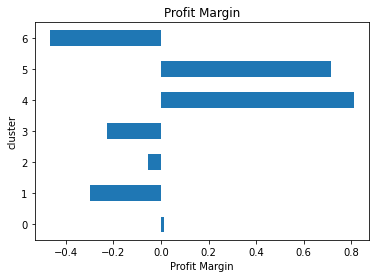

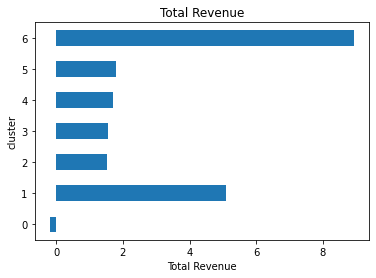

In [369]:
g7.groupby('cluster')['Profit_Margin'].mean().plot(kind='barh')
plt.xlabel('Profit Margin');
plt.title('Profit Margin')
plt.show()

g7.groupby('cluster')['Total_Revenue'].mean().plot(kind='barh')
plt.xlabel('Total Revenue');
plt.title('Total Revenue');

#### Cluster 1 and 6 companies have large revenue but have made loss on average.

In [370]:
f7 = g7.merge(securities, right_on = 'Ticker symbol', left_index=True)
f7.index = g7.index
f7.head(2)

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,-0.014684,0.074877,-3.099314,0.358506,-0.979051,0.461047,-0.128348,0.215027,-0.172575,-0.008650,0.012045,-0.212650,0.060756,-0.187895,-0.294045,0.310194,-0.13035,0.644938,-0.113087,0.657466,1.085777,-0.956195,-0.008469,0.474542,-0.162525,0.173923,-0.453738,0.211397,-0.166952,-0.145837,-0.275189,0.137045,-0.035286,-0.063963,0.200348,-0.090301,-0.000862,0.108631,0.003912,-0.310674,-0.235788,0.491502,0.157364,-0.712887,-0.107305,0.240690,-0.079707,-1.049275,0.120007,0.259287,0.070547,-0.100900,0.080295,-0.562758,0.148624,-0.289800,-0.289401,-0.664559,-0.206981,1.445648,-0.065463,0.866609,-0.080145,0.306841,0.838088,-0.493128,-0.028863,-0.088222,0.335651,0.276083,0,AAL,American Airlines Group,Industrials,Airlines
AAP,-0.111791,0.035926,-0.147649,-0.133122,0.346738,-0.427877,-0.149078,-0.533279,-0.176541,-0.268461,-0.224019,-0.312946,-0.400521,-0.337682,-0.313688,0.292620,-0.13035,-0.373638,-0.434622,0.031613,-0.250510,-0.249341,-0.247589,-0.265079,0.483555,0.128304,0.054208,-0.268840,-0.166952,-0.145837,-0.275189,-0.080576,-0.058001,-0.388108,0.106508,0.227067,-0.340378,-0.089774,-0.339080,-0.321286,-0.375160,-0.223839,-0.321615,-0.592643,-0.191713,-0.398166,-0.137226,0.209248,-0.108851,-0.055567,-0.165570,-0.009703,-0.311582,-0.579374,-0.097882,-0.663592,-0.289401,-0.309051,0.329418,-0.101417,-0.147100,-0.201560,-0.242133,-0.190380,-0.162844,-0.393111,-0.215203,-0.242049,-0.300925,0.276070,0,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail


In [371]:
f7.groupby('cluster')['GICS Sector'].unique()
f7.groupby('cluster').agg(
    {'Ticker symbol':'count', 
     'GICS Sub Industry': 'nunique',
     'GICS Sector': 'nunique'})  


cluster
0    [Industrials, Consumer Discretionary, Health C...
1    [Information Technology, Energy, Telecommunica...
2                                         [Financials]
3    [Financials, Health Care, Consumer Discretiona...
4                                         [Financials]
5                                         [Financials]
6                                             [Energy]
Name: GICS Sector, dtype: object

,Ticker symbol,GICS Sub Industry,GICS Sector
cluster,,,
0,414,118,11
1,5,4,4
2,2,1,1
3,24,21,6
4,1,1,1
5,1,1,1
6,1,1,1


#### Take a look at clusters having 1 or 2 companies..

In [372]:
f7.loc[f7['cluster'].isin([2,4,5,6])]

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAC,9.983138,0.144721,-0.147066,-0.293917,0.426550,-0.477417,11.014321,0.215027,16.726470,-0.313507,-0.224019,-0.362721,1.847299,3.593561,1.821742,-12.362899,2.153623,0.103145,8.468910,-1.855878,-0.533984,1.415547,0.495371,9.236172,-0.397324,-2.336397,4.435570,3.975000,10.815978,-0.145837,-0.275189,-10.859972,11.961013,4.552654,-0.656596,-1.825803,1.992131,-4.160559,1.656021,2.200526,7.910457,-0.223839,-0.480929,-1.245395,4.761603,-0.451386,10.368632,-1.662513,8.803182,0.274785,-0.169902,5.679422,1.602472,-0.346759,-0.284391,-0.368493,-0.289401,2.594503,-0.009943,7.054429,11.946447,1.00626,10.299348,-0.509351,-0.508008,8.992771,10.252946,10.299326,1.910882,0.282682,2,BAC,Bank of America Corp,Financials,Banks
C,3.546455,0.144721,2.650166,-0.280979,-0.741270,9.124364,7.345103,0.215027,-0.173177,-0.410554,-0.224019,-0.362721,1.108260,5.134942,2.709434,-9.351571,-0.130350,-0.444919,2.597364,2.117788,4.403416,2.780692,0.433289,14.837253,-0.397324,-2.952398,-3.597183,12.222514,8.774702,0.422751,-0.275189,-12.346384,-2.458818,4.714954,-5.431035,-0.198368,2.626749,3.900493,2.658430,2.423550,3.032983,16.042494,2.811760,0.317774,5.077289,-0.451386,8.437286,-7.608666,3.284463,0.995559,1.112895,9.980536,2.564222,0.467393,-0.268740,0.261051,-0.289401,4.194388,1.140564,5.131375,11.007523,-0.20156,8.764516,-0.509351,-0.508008,7.589103,8.734047,8.764510,1.139237,0.046938,2,C,Citigroup Inc.,Financials,Banks
JPM,13.535931,10.603803,-0.147066,-0.253256,0.426124,7.881306,10.909987,0.215027,0.272612,-0.410554,-0.224019,-0.362721,1.871318,6.137795,5.050137,0.372972,-0.130350,0.326182,5.637163,2.117788,6.400452,4.435033,1.143925,8.366323,-0.397324,-3.100266,-1.803055,14.659000,11.318504,17.995605,-0.275189,-3.879763,-12.054570,8.612598,2.150725,-9.424480,5.297176,3.846273,4.917528,4.826994,7.634864,-0.223839,5.742059,0.901816,4.007551,-0.451386,11.719418,0.884564,6.964566,0.157270,-0.169902,15.092495,0.639644,0.899392,-0.242655,0.713536,-0.289401,4.547578,0.477403,6.664683,12.720464,-0.20156,11.704544,-0.509351,-0.508008,8.263363,11.929016,11.704508,1.802465,-0.911162,5,JPM,JPMorgan Chase & Co.,Financials,Banks
WFC,5.086363,-0.261286,-0.147066,-0.229229,0.426124,4.913707,10.998215,0.215027,0.823084,-0.367867,-0.224019,-0.362721,0.895281,5.629190,5.597894,0.310194,-0.130350,0.026748,2.786458,-1.855878,-0.533984,5.743074,-0.306406,2.677820,-0.397324,-18.569349,-2.352477,-0.310193,8.733472,0.203308,-0.275189,7.241361,-0.168905,5.071296,16.917

####  Interestingly, companies in the tiny clusters are only Energy and Financial companies. Global energy giant EXXON MOBIL is in its own cluster.

#### Some global finance giants have again fallen into same cluster or clusters of their own (WFC, BAC, JPM, C) (These can be outliers, as they are always appearing in their own clusters).

### Trying with Gaussian Mixture models

#### 5 clusters

In [373]:
gm5 = GaussianMixture(n_components=5)

In [374]:
dfgm = g[orig_cols]

In [375]:
def get_gm_clusters(df, nc):
# function to fit KMeans on the dataset and calculate the inertia    
    
    dff = df.copy()
    gm = GaussianMixture(n_components = nc, random_state=21)
    clusters = gm.fit_predict(dff.select_dtypes('float64'))
    return clusters

In [380]:
clus = get_gm_clusters(dfgm, 5)
dfgm['cluster'] = clus

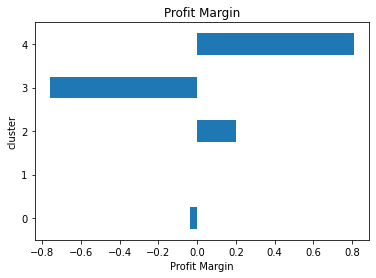

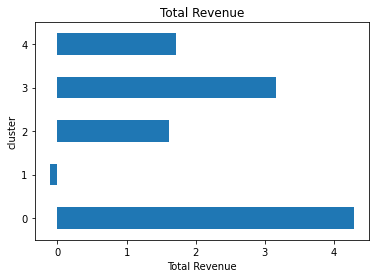

In [381]:
dfgm.groupby('cluster')['Profit_Margin'].mean().plot(kind='barh')
plt.xlabel('Profit Margin');
plt.title('Profit Margin')
plt.show()

dfgm.groupby('cluster')['Total_Revenue'].mean().plot(kind='barh')
plt.xlabel('Total Revenue');
plt.title('Total Revenue');

In [382]:
dfgm['cluster'].value_counts()

1    434
0      9
2      3
3      1
4      1
Name: cluster, dtype: int64

In [383]:
final = dfgm.merge(securities, right_on = 'Ticker symbol', left_index=True)
final.index = dfgm.index
final.head(2)

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,-0.014684,0.074877,-3.099314,0.358506,-0.979051,0.461047,-0.128348,0.215027,-0.172575,-0.008650,0.012045,-0.212650,0.060756,-0.187895,-0.294045,0.310194,-0.13035,0.644938,-0.113087,0.657466,1.085777,-0.956195,-0.008469,0.474542,-0.162525,0.173923,-0.453738,0.211397,-0.166952,-0.145837,-0.275189,0.137045,-0.035286,-0.063963,0.200348,-0.090301,-0.000862,0.108631,0.003912,-0.310674,-0.235788,0.491502,0.157364,-0.712887,-0.107305,0.240690,-0.079707,-1.049275,0.120007,0.259287,0.070547,-0.100900,0.080295,-0.562758,0.148624,-0.289800,-0.289401,-0.664559,-0.206981,1.445648,-0.065463,0.866609,-0.080145,0.306841,0.838088,-0.493128,-0.028863,-0.088222,0.335651,0.276083,1,AAL,American Airlines Group,Industrials,Airlines
AAP,-0.111791,0.035926,-0.147649,-0.133122,0.346738,-0.427877,-0.149078,-0.533279,-0.176541,-0.268461,-0.224019,-0.312946,-0.400521,-0.337682,-0.313688,0.292620,-0.13035,-0.373638,-0.434622,0.031613,-0.250510,-0.249341,-0.247589,-0.265079,0.483555,0.128304,0.054208,-0.268840,-0.166952,-0.145837,-0.275189,-0.080576,-0.058001,-0.388108,0.106508,0.227067,-0.340378,-0.089774,-0.339080,-0.321286,-0.375160,-0.223839,-0.321615,-0.592643,-0.191713,-0.398166,-0.137226,0.209248,-0.108851,-0.055567,-0.165570,-0.009703,-0.311582,-0.579374,-0.097882,-0.663592,-0.289401,-0.309051,0.329418,-0.101417,-0.147100,-0.201560,-0.242133,-0.190380,-0.162844,-0.393111,-0.215203,-0.242049,-0.300925,0.276070,1,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail


In [384]:
final.groupby('cluster')['GICS Sector'].unique()

final.groupby('cluster').agg(
    {'Ticker symbol':'count', 
     'GICS Sub Industry': 'nunique',
     'GICS Sector': 'nunique'})

cluster
0    [Information Technology, Energy, Health Care, ...
1    [Industrials, Consumer Discretionary, Health C...
2                                         [Financials]
3                             [Consumer Discretionary]
4                                         [Financials]
Name: GICS Sector, dtype: object

,Ticker symbol,GICS Sub Industry,GICS Sector
cluster,,,
0,9,7,5
1,434,121,11
2,3,1,1
3,1,1,1
4,1,1,1


#### Let us see if we have the same outlier clusters as with kmeans.

In [385]:
final.loc[final['cluster'].isin([2])]

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAC,9.983138,0.144721,-0.147066,-0.293917,0.426550,-0.477417,11.014321,0.215027,16.726470,-0.313507,-0.224019,-0.362721,1.847299,3.593561,1.821742,-12.362899,2.153623,0.103145,8.468910,-1.855878,-0.533984,1.415547,0.495371,9.236172,-0.397324,-2.336397,4.435570,3.975000,10.815978,-0.145837,-0.275189,-10.859972,11.961013,4.552654,-0.656596,-1.825803,1.992131,-4.160559,1.656021,2.200526,7.910457,-0.223839,-0.480929,-1.245395,4.761603,-0.451386,10.368632,-1.662513,8.803182,0.274785,-0.169902,5.679422,1.602472,-0.346759,-0.284391,-0.368493,-0.289401,2.594503,-0.009943,7.054429,11.946447,1.00626,10.299348,-0.509351,-0.508008,8.992771,10.252946,10.299326,1.910882,0.282682,2,BAC,Bank of America Corp,Financials,Banks
C,3.546455,0.144721,2.650166,-0.280979,-0.741270,9.124364,7.345103,0.215027,-0.173177,-0.410554,-0.224019,-0.362721,1.108260,5.134942,2.709434,-9.351571,-0.130350,-0.444919,2.597364,2.117788,4.403416,2.780692,0.433289,14.837253,-0.397324,-2.952398,-3.597183,12.222514,8.774702,0.422751,-0.275189,-12.346384,-2.458818,4.714954,-5.431035,-0.198368,2.626749,3.900493,2.658430,2.423550,3.032983,16.042494,2.811760,0.317774,5.077289,-0.451386,8.437286,-7.608666,3.284463,0.995559,1.112895,9.980536,2.564222,0.467393,-0.268740,0.261051,-0.289401,4.194388,1.140564,5.131375,11.007523,-0.20156,8.764516,-0.509351,-0.508008,7.589103,8.734047,8.764510,1.139237,0.046938,2,C,Citigroup Inc.,Financials,Banks
JPM,13.535931,10.603803,-0.147066,-0.253256,0.426124,7.881306,10.909987,0.215027,0.272612,-0.410554,-0.224019,-0.362721,1.871318,6.137795,5.050137,0.372972,-0.130350,0.326182,5.637163,2.117788,6.400452,4.435033,1.143925,8.366323,-0.397324,-3.100266,-1.803055,14.659000,11.318504,17.995605,-0.275189,-3.879763,-12.054570,8.612598,2.150725,-9.424480,5.297176,3.846273,4.917528,4.826994,7.634864,-0.223839,5.742059,0.901816,4.007551,-0.451386,11.719418,0.884564,6.964566,0.157270,-0.169902,15.092495,0.639644,0.899392,-0.242655,0.713536,-0.289401,4.547578,0.477403,6.664683,12.720464,-0.20156,11.704544,-0.509351,-0.508008,8.263363,11.929016,11.704508,1.802465,-0.911162,2,JPM,JPMorgan Chase & Co.,Financials,Banks


#### Again, we see that finance giants have separated out.

In [387]:
final.loc[final['cluster'].isin([3])]

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,1.119544,-6.230441,2.569727,-0.149756,-1.984795,1.433821,0.100017,-2.458853,-0.17211,3.937695,4.417791,-0.229218,3.113462,1.087206,1.089083,-2.998824,2.002842,2.42323,-0.507276,-1.388972,0.778558,0.739787,-0.306406,0.48377,1.828821,5.006583,4.380288,3.516615,0.029593,-0.137775,1.132285,2.743918,0.007313,1.793509,1.556755,-2.415136,1.23783,-0.076405,1.255289,1.485829,9.325896,-0.170623,0.843742,-0.953374,0.030095,0.711828,-0.049245,-3.032651,-0.108405,-19.023644,0.454013,-0.306314,-0.311582,-0.811988,-0.155269,-0.761958,-0.289401,0.259375,0.066348,0.820893,0.969988,3.689528,0.804496,8.469555,5.224314,0.593853,0.816342,0.804569,3.16192,0.220595,3,F,Ford Motor,Consumer Discretionary,Automobile Manufacturers


#### For Motors, a highly successful auto manufacturer, is its own cluster.

In [388]:
final.loc[final['cluster'].isin([4])]

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WFC,5.086363,-0.261286,-0.147066,-0.229229,0.426124,4.913707,10.998215,0.215027,0.823084,-0.367867,-0.224019,-0.362721,0.895281,5.62919,5.597894,0.310194,-0.13035,0.026748,2.786458,-1.855878,-0.533984,5.743074,-0.306406,2.67782,-0.397324,-18.569349,-2.352477,-0.310193,8.733472,0.203308,-0.275189,7.241361,-0.168905,5.071296,16.917526,-15.349657,5.389483,-17.438708,5.139726,4.91129,-0.431144,-0.223839,-0.480929,-1.245395,3.658589,-0.451386,10.213386,0.738429,16.401549,3.002347,-0.169902,-0.313414,1.411436,1.198468,-0.21657,0.811903,-0.289401,3.573948,-0.880419,4.911579,3.133955,-0.20156,7.656401,-0.509351,-0.508008,6.415124,7.660187,7.656406,1.711231,-0.567281,4,WFC,Wells Fargo,Financials,Banks


#### Wells Fargo separates out as earlier seen.

#### Let us take a look at the top 5 sub-industries in the 2 large clusters.

In [389]:
final.loc[final['cluster'].isin([0])]['GICS Sub Industry'].value_counts()[:5]

Integrated Oil & Gas                      2
Integrated Telecommunications Services    2
Pharmaceuticals                           1
Hypermarkets & Super Centers              1
IT Consulting & Other Services            1
Name: GICS Sub Industry, dtype: int64

In [390]:
final.loc[final['cluster'].isin([1])]['GICS Sub Industry'].value_counts()[:5]

Industrial Conglomerates              19
Internet Software & Services          17
Oil & Gas Exploration & Production    16
REITs                                 14
Health Care Equipment                 14
Name: GICS Sub Industry, dtype: int64

#### No particular trend seems to be visible as the industries within each cluster are quite varied.

#### Trying with 7 clusters.

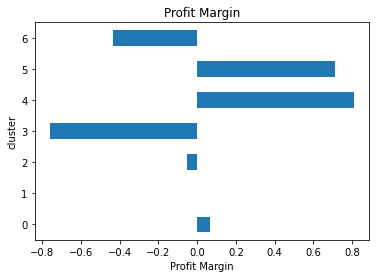

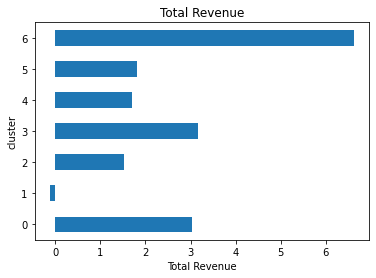

In [391]:
dfgm = g[orig_cols]
clus = get_gm_clusters(dfgm, 7)
dfgm['cluster'] = clus

dfgm.groupby('cluster')['Profit_Margin'].mean().plot(kind='barh')
plt.xlabel('Profit Margin');
plt.title('Profit Margin')
plt.show()

dfgm.groupby('cluster')['Total_Revenue'].mean().plot(kind='barh')
plt.xlabel('Total Revenue');
plt.title('Total Revenue');

In [392]:
final = dfgm.merge(securities, right_on = 'Ticker symbol', left_index=True)
final.index = dfgm.index

final.groupby('cluster')['GICS Sector'].unique()

final.groupby('cluster').agg(
    {'Ticker symbol':'count', 
     'GICS Sub Industry': 'nunique',
     'GICS Sector': 'nunique'})

cluster
0    [Information Technology, Consumer Discretionar...
1    [Industrials, Consumer Discretionary, Health C...
2                                         [Financials]
3                             [Consumer Discretionary]
4                                         [Financials]
5                                         [Financials]
6                                             [Energy]
Name: GICS Sector, dtype: object

,Ticker symbol,GICS Sub Industry,GICS Sector
cluster,,,
0,10,9,5
1,431,120,11
2,2,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,2,1,1


#### Interestingly, the biggest cluster ALWAYS has more than 400 elements even if we take 7 clusters. Let us take a look at the smaller clusters and see if the outliers are same as earlier.

In [393]:
final.loc[final['cluster'].isin([3,4,5])]

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,1.119544,-6.230441,2.569727,-0.149756,-1.984795,1.433821,0.100017,-2.458853,-0.172110,3.937695,4.417791,-0.229218,3.113462,1.087206,1.089083,-2.998824,2.002842,2.423230,-0.507276,-1.388972,0.778558,0.739787,-0.306406,0.483770,1.828821,5.006583,4.380288,3.516615,0.029593,-0.137775,1.132285,2.743918,0.007313,1.793509,1.556755,-2.415136,1.237830,-0.076405,1.255289,1.485829,9.325896,-0.170623,0.843742,-0.953374,0.030095,0.711828,-0.049245,-3.032651,-0.108405,-19.023644,0.454013,-0.306314,-0.311582,-0.811988,-0.155269,-0.761958,-0.289401,0.259375,0.066348,0.820893,0.969988,3.689528,0.804496,8.469555,5.224314,0.593853,0.816342,0.804569,3.161920,0.220595,3,F,Ford Motor,Consumer Discretionary,Automobile Manufacturers
JPM,13.535931,10.603803,-0.147066,-0.253256,0.426124,7.881306,10.909987,0.215027,0.272612,-0.410554,-0.224019,-0.362721,1.871318,6.137795,5.050137,0.372972,-0.130350,0.326182,5.637163,2.117788,6.400452,4.435033,1.143925,8.366323,-0.397324,-3.100266,-1.803055,14.659000,11.318504,17.995605,-0.275189,-3.879763,-12.054570,8.612598,2.150725,-9.424480,5.297176,3.846273,4.917528,4.826994,7.634864,-0.223839,5.742059,0.901816,4.007551,-0.451386,11.719418,0.884564,6.964566,0.157270,-0.169902,15.092495,0.639644,0.899392,-0.242655,0.713536,-0.289401,4.547578,0.477403,6.664683,12.720464,-0.201560,11.704544,-0.509351,-0.508008,8.263363,11.929016,11.704508,1.802465,-0.911162,5,JPM,JPMorgan Chase & Co.,Financials,Banks
WFC,5.086363,-0.261286,-0.147066,-0.229229,0.426124,4.913707,10.998215,0.215027,0.823084,-0.367867,-0.224019,-0.362721,0.895281,5.629190,5.597894,0.310194,-0.130350,0.026748,2.786458,-1.855878,-0.533984,5.743074,-0.306406,2.677820,-0.397324,-18.569349,-2.352477,-0.310193,8.733472,0.203308,-0.275189,7.241361,-0.168905,5.071296,16.917526,-15.349657,5.389483,-17.438708,5.139726,4.911290,-0.431144,-0.223839,-0.480929,-1.245395,3.658589,-0.451386,10.213386,0.738429,16.401549,3.002347,-0.169902,-0.313414,1.411436,1.198468,-0.216570,0.811903,-0.289401,3.573948,-0.880419,4.911579,3.133955,-0.201560,7.656401,-0.509351,-0.508008,6.415124,7.660187,7.656406,1.711231,-0.567281,4,WFC,Wells Fargo,Financials,Banks


#### Financial firms in one cluster, presence of Ford Motors seems to be odd.

In [394]:
final.loc[final['cluster'].isin([2,6])]

,Accounts_Payable,Accounts_Receivable,Addl_incomeexpense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_EarningsLoss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt__Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock,cluster,Ticker symbol,Security,GICS Sector,GICS Sub Industry
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAC,9.983138,0.144721,-0.147066,-0.293917,0.426550,-0.477417,11.014321,0.215027,16.726470,-0.313507,-0.224019,-0.362721,1.847299,3.593561,1.821742,-12.362899,2.153623,0.103145,8.468910,-1.855878,-0.533984,1.415547,0.495371,9.236172,-0.397324,-2.336397,4.435570,3.975000,10.815978,-0.145837,-0.275189,-10.859972,11.961013,4.552654,-0.656596,-1.825803,1.992131,-4.160559,1.656021,2.200526,7.910457,-0.223839,-0.480929,-1.245395,4.761603,-0.451386,10.368632,-1.662513,8.803182,0.274785,-0.169902,5.679422,1.602472,-0.346759,-0.284391,-0.368493,-0.289401,2.594503,-0.009943,7.054429,11.946447,1.006260,10.299348,-0.509351,-0.508008,8.992771,10.252946,10.299326,1.910882,0.282682,2,BAC,Bank of America Corp,Financials,Banks
C,3.546455,0.144721,2.650166,-0.280979,-0.741270,9.124364,7.345103,0.215027,-0.173177,-0.410554,-0.224019,-0.362721,1.108260,5.134942,2.709434,-9.351571,-0.130350,-0.444919,2.597364,2.117788,4.403416,2.780692,0.433289,14.837253,-0.397324,-2.952398,-3.597183,12.222514,8.774702,0.422751,-0.275189,-12.346384,-2.458818,4.714954,-5.431035,-0.198368,2.626749,3.900493,2.658430,2.423550,3.032983,16.042494,2.811760,0.317774,5.077289,-0.451386,8.437286,-7.608666,3.284463,0.995559,1.112895,9.980536,2.564222,0.467393,-0.268740,0.261051,-0.289401,4.194388,1.140564,5.131375,11.007523,-0.201560,8.764516,-0.509351,-0.508008,7.589103,8.734047,8.764510,1.139237,0.046938,2,C,Citigroup Inc.,Financials,Banks
CVX,1.751260,0.114058,7.226097,-0.232926,-10.996379,0.942821,0.126041,0.215027,0.023909,4.258908,1.941543,9.424127,7.228580,4.647482,5.110629,-0.694257,9.274794,8.453738,0.085871,-0.723383,3.576017,6.684299,-0.306406,-0.315899,1.324332,0.133143,-0.711864,0.513952,0.039174,0.288403,-0.275189,1.677456,-1.551986,4.182799,-0.583213,-3.059066,4.358127,-1.194549,4.407537,5.582577,1.968122,2.056759,3.680850,-0.558288,-0.193714,3.941270,-0.138110,-1.561146,-0.103855,1.934589,-0.019462,-0.123652,5.573229,-0.247067,-0.204831,-0.407840,-0.289401,6.561466,-1.093765,1.454799,-0.035968,-0.144716,0.983827,2.964130,2.885734,5.325383,0.346583,0.983899,4.329323,-2.547473,6,CVX,Chevron Corp.,Energy,Integrated Oil & Gas
XOM,3.226880,3.791970,12.592563,-0.184872,-10.445711,-0.477417,-0.049931,-4.109732,0.975993,8.081450,-0.224019,8.353613,7.581890,8.655306,9.419789,-0.971696,17.785305,12.316733,-0.507276,-0.534634,8.900783,11.646097,-0.306406,-0.089330,3.919883,0.114655,-2.912319,0.290256,0.086350,2.040965,-0.275189,1.455350,-2.813706,6.121683,-3.20

#### The global financial services and energy giants are always separated out into sparsely populated clusters.

#### Let us see the trend in the financial data of the global banks. Let us compare the mean values for some of the columns in the complete dataset to those for the global bank tickers.

In [395]:
bank_tickers = ['BAC','C', 'WFC', 'JPM']

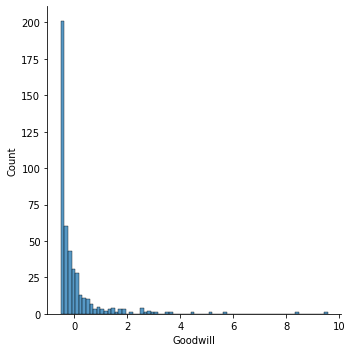

In [309]:
sns.displot(g['Goodwill'])

In [310]:
g['Goodwill'].mean(), g.loc[bank_tickers, 'Goodwill'].mean()

(-2.7755575615628914e-17, 4.8724739377717725)

#### The 4 global banks very high values of "Goodwill" compared to the general trend in the dataset.

#### Let us see the values for some other columns.

In [311]:
col_subset = ['Net_Borrowings', 'Net_Cash_Flow','Total_Assets', 'Total_Current_Assets',
              'Total_Current_Liabilities', 'Total_Equity', 'Total_Liabilities',
              'Total_Liabilities__Equity', 'Total_Revenue']

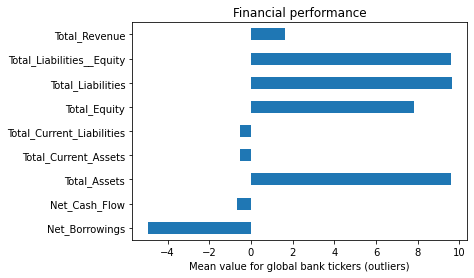

In [312]:
g.loc[bank_tickers, col_subset].mean().plot(kind='barh')
plt.xlabel('Mean value for global bank tickers (outliers)');
plt.title('Financial performance');

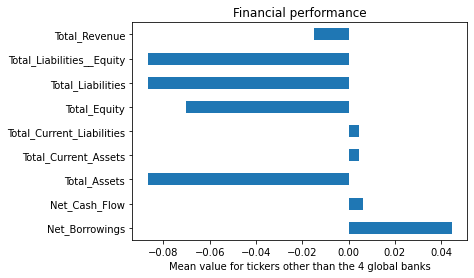

In [313]:
g.drop(bank_tickers).loc[:, col_subset].mean().plot(kind='barh')
plt.xlabel('Mean value for tickers other than the 4 global banks')
plt.title('Financial performance');

#### As we can see, the values for total assets, liabilities, revenue, net cash flow, etc are many orders of magnitude higher for global banks, compared to the group trend.

### Trends in stock prices and returns.

In [396]:
prices = pd.read_csv('../input/nyse-stock-exchange-data/prices-split-adjusted.csv')
prices.head(2)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0


In [397]:
prices['range'] = prices['high'] - prices['low']
prices['return']= prices['close']- prices['open']

In [398]:
prices = prices.merge(securities, left_on = 'symbol', right_on = 'Ticker symbol', how='inner')

#### Let us see if returns follow normal distribution.

ABT


WAT


O


MCO


WHR


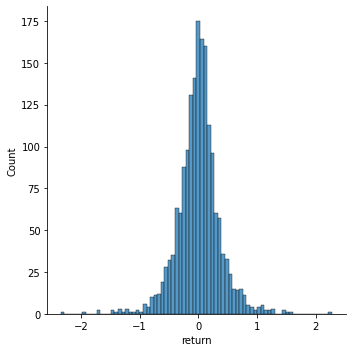

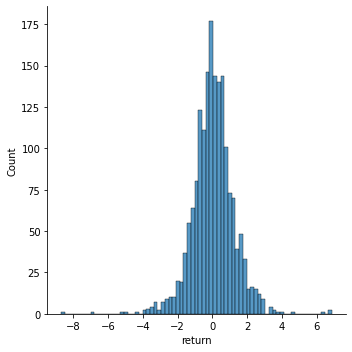

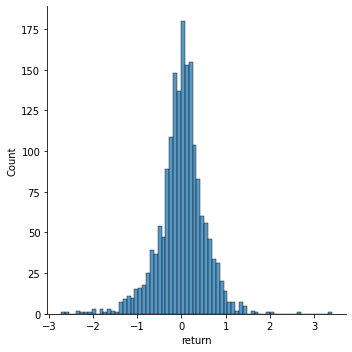

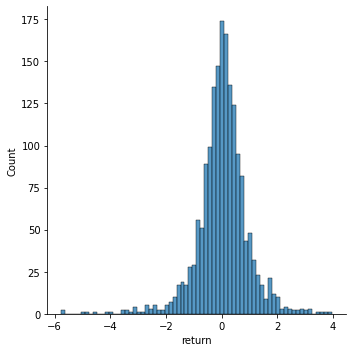

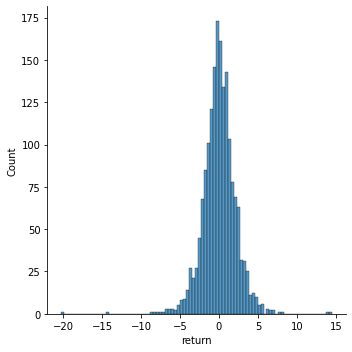

In [400]:
for symbol in prices['symbol'].sample(5):
    print(symbol)
    sns.displot(prices.loc[prices['symbol'] == symbol]['return'])

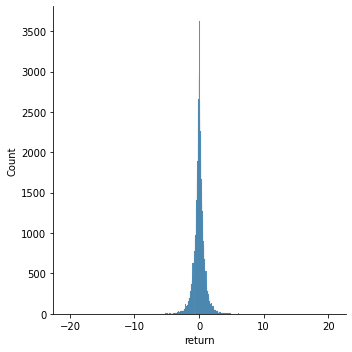

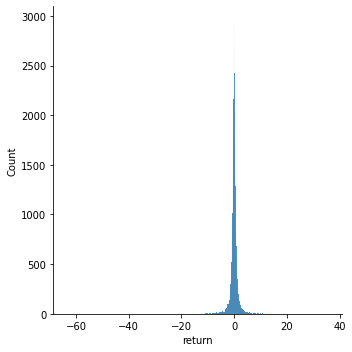

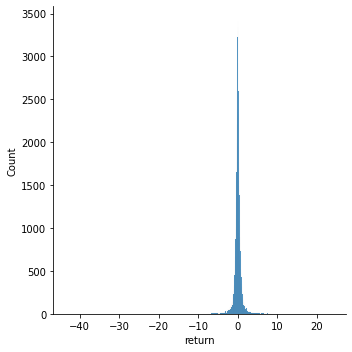

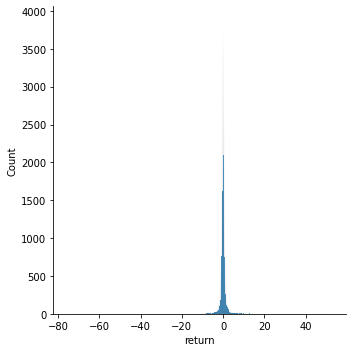

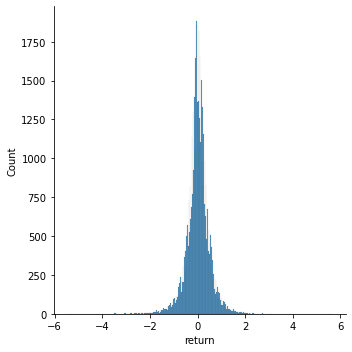

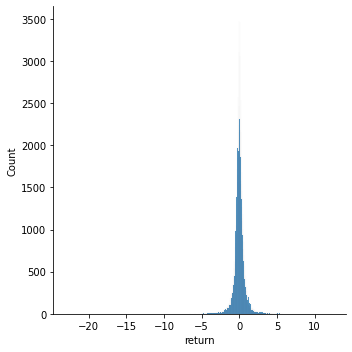

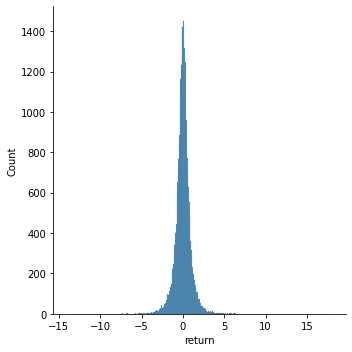

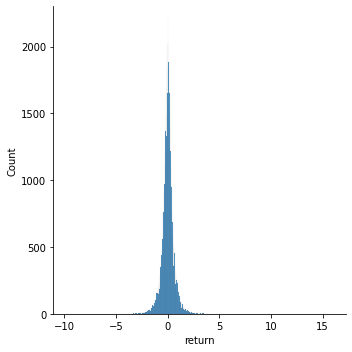

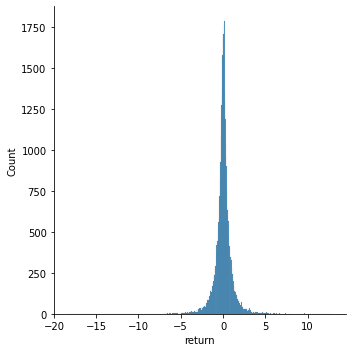

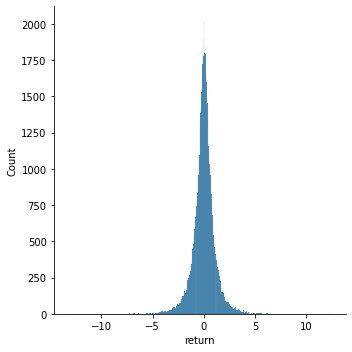

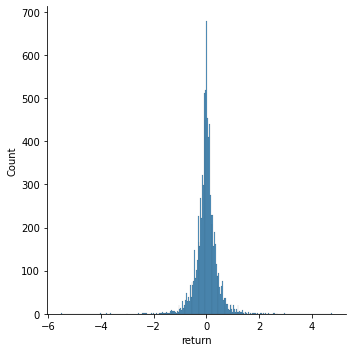

In [401]:
for sector in securities['GICS Sector'].unique():
    sns.displot(prices.loc[prices['GICS Sector'] == sector, 'return']);

#### The daily returns do seem to follow a normal distribution with mean 0.

<AxesSubplot:ylabel='GICS Sector'>

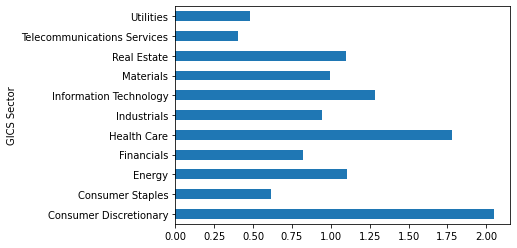

In [402]:
prices.groupby('GICS Sector')['return'].std().plot(kind='barh')

#### Consumer discretionary, Healthcare and IT have the largest deviations in returns. Telecommunication and Utilities have the lowest deviation.

### Trends in returns over time periods.

In [403]:
securities = pd.read_csv('../input/nyse-stock-exchange-data/securities.csv')
securities.head(2)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800


In [404]:
prices = pd.read_csv('../input/nyse-stock-exchange-data/prices-split-adjusted.csv')
prices.head(2)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0


In [405]:
df = prices.merge(securities, right_on='Ticker symbol', left_on = 'symbol', how='inner')
df.set_index('symbol', inplace=True)
df.head(2)

,date,open,close,low,high,volume,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
symbol,,,,,,,,,,,,,,
WLTW,2016-01-05,123.430000,125.839996,122.309998,126.250000,2163600.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536
WLTW,2016-01-06,125.239998,119.980003,119.940002,125.540001,2386400.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536


In [406]:
df['return'] = df['close'] - df['open']
df['range'] = df['high'] - df['low']
df.head(2)

,date,open,close,low,high,volume,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,return,range
symbol,,,,,,,,,,,,,,,,
WLTW,2016-01-05,123.430000,125.839996,122.309998,126.250000,2163600.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536,2.409996,3.940002
WLTW,2016-01-06,125.239998,119.980003,119.940002,125.540001,2386400.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536,-5.259995,5.599999


#### Let us see which sectors have given the best average daily returns.

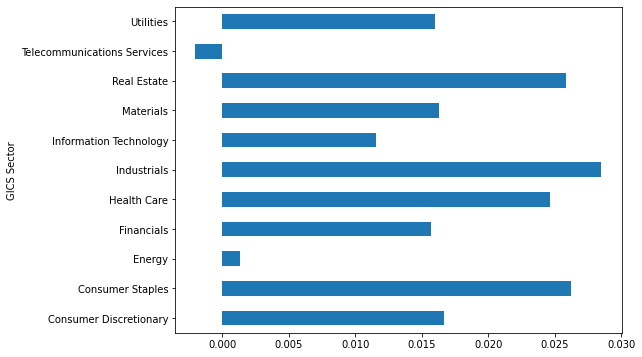

In [407]:
plt.figure(figsize=(8,6))
df.groupby('GICS Sector')['return'].mean().plot(kind='barh');

#### Industrials, Real Estate and Consumer Staples have given the best returns.
#### Telecommunication is the only sector with negative returns.

### Trends in daily returns by week days, months, etc.

In [408]:
df['date'] = pd.to_datetime(df['date'])

In [409]:
def add_date_part(df, date_col = 'date', drop_date_col=False):
    
    dff = df.copy()
    dff['DAY_NAME'] = df[date_col].dt.day_name()
    dff['DAY_OF_MONTH'] = df[date_col].dt.day
    dff['DAY_OF_YEAR'] = df[date_col].dt.dayofyear
    dff['IS_MONTH_START'] = df[date_col].dt.is_month_start
    dff['IS_MONTH_END'] = df[date_col].dt.is_month_end
    dff['IS_QUARTER_START'] = df[date_col].dt.is_quarter_start
    dff['IS_QUARTER_END'] = df[date_col].dt.is_quarter_end
    dff['MONTH_NAME'] = df[date_col].dt.month_name()
    dff['WEEK'] = df[date_col].dt.isocalendar().week
    dff['IS_YEAR_START'] = df[date_col].dt.is_year_start
    dff['IS_YEAR_END'] = df[date_col].dt.is_year_end
    if drop_date_col == True:
        dff= df.drop(date_col, axis=1)
    return dff

In [410]:
df = add_date_part(df, 'date')
df.head(2)

,date,open,close,low,high,volume,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,return,range,DAY_NAME,DAY_OF_MONTH,DAY_OF_YEAR,IS_MONTH_START,IS_MONTH_END,IS_QUARTER_START,IS_QUARTER_END,MONTH_NAME,WEEK,IS_YEAR_START,IS_YEAR_END
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,
WLTW,2016-01-05,123.430000,125.839996,122.309998,126.250000,2163600.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536,2.409996,3.940002,Tuesday,5,5,False,False,False,False,January,1,False,False
WLTW,2016-01-06,125.239998,119.980003,119.940002,125.540001,2386400.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536,-5.259995,5.599999,Wednesday,6,6,False,False,False,False,January,1,False,False


<AxesSubplot:ylabel='DAY_NAME'>

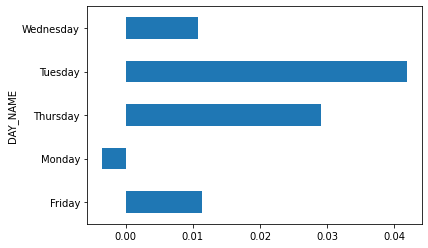

In [411]:
df.groupby('DAY_NAME')['return'].mean().plot(kind='barh')

#### Monday gives negative returns on average ! This may point towards a trend in the trading habits of people.
#### Interestingly, Tuesday has the highest daily returns. Perhaps this is because people trade more carefully after suffering losses on Monday !

#### Average returns by month

<AxesSubplot:ylabel='MONTH_NAME'>

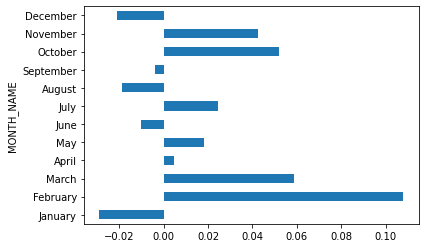

In [412]:
m = df.groupby('MONTH_NAME')['return'].mean()
m.reindex(['January','February','March','April','May','June',
           'July','August', 'September',
           'October', 'November','December']).plot(kind='barh')

#### Highest average daily returns are obtained in February and March. January and December have the lowest returns.

<AxesSubplot:ylabel='IS_QUARTER_START'>

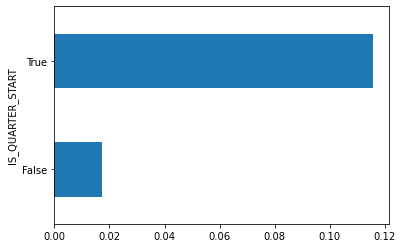

In [413]:
df.groupby('IS_QUARTER_START')['return'].mean().plot(kind='barh')

#### Quarter start days give more daily returns on average. This may be due to the bullish trend in anticipation of quarterly performance results.

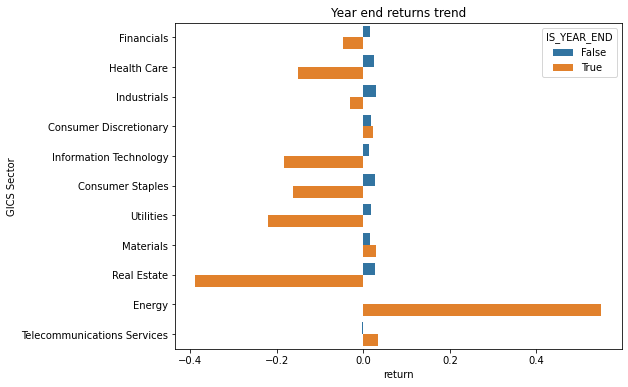

In [429]:
plt.figure(figsize=(8,6))
sns.barplot(x='return',y='GICS Sector',hue='IS_YEAR_END', data=df, ci=None)
plt.title('Year end returns trend');

#### Almost all sectors seem to give very negative average returns on the last day of the year, probably because of the emotionally charged trading. Only the Energy sector seems to be giving positive returns.

### END